### OPIS NOTEBOOK I PLAN DZIALANIA, moze cos o modelach klasycznych i dlaczego takie wybralem

#### Plan działania:

1. Wczytanie i wstępna analiza danych: Sprawdzenie typów danych, brakujących wartości, oraz podstawowych statystyk.

2. Analiza korelacji cech: To pomoże nam zdecydować, które zmienne mogą być przydatne do predykcji produkcji energii.

3. Wybór modeli i cech: Na podstawie analizy korelacji wybierzemy odpowiednie cechy do modelowania.

4. Porównanie modeli na ustawieniach domyślnych: Trenowanie różnych modeli z biblioteki sklearn na danych i porównanie ich wyników.

5. Optymalizacja hiperparametrów: Przetestowanie różnych ustawień hiperparametrów dla wybranych modeli.

6. Normalizacja danych: Sprawdzenie, jak normalizacja wpływa na wyniki modeli.

7. Ekstrapolacja w przyszłość: Użycie najlepszego modelu do predykcji na lata 2024-2035.


#### 1. Wczytanie i wstępna analiza danych

In [1]:
import pandas as pd

# Wczytanie danych z pliku CSV
data_path = '../2. Data/processed/final_df_processed.csv'
data = pd.read_csv(data_path)

In [2]:
data.head()

,Unnamed: 0,date,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,estimated_irradiance,temp_modifier,humidity_modifier,daily_energy_production_kWh,year,month
0,0,1979-01-01,Baden_Baden,48.765640,8.228524,-10.442083,-16.532917,-16.18,3.02,1013.666667,81.916667,3.681667,100,Snow,1.5,1.0,0.95,5.7,1979,1
1,1,1979-01-01,Bozanska,54.473028,18.302179,-14.100000,-20.617500,-19.14,-9.46,1002.416667,82.000000,6.157917,100,Snow,1.5,1.0,0.95,5.7,1979,1
2,2,1979-01-01,Walcz_Drugi,53.257039,16.521203,-16.437083,-23.322500,-21.26,-9.57,1003.708333,82.416667,3.682083,100,Clouds,2.0,1.0,0.95,7.6,1979,1
3,3,1979-01-02,Baden_Baden,48.765640,8.228524,-8.856667,-14.874167,-15.82,-3.96,1024.250000,84.208333,4.524583,100,Snow,1.5,1.0,0.95,5.7,1979,1
4,4,1979-01-02,Bozanska,54.473028,18.302179,-9.037917,-15.179167,-14.14,-7.40,1004.791667,85.375000,4.449583,100,Clouds,2.0,1.0,0.95,7.6,1979,1


In [3]:
# Podstawowe informacje o danych
data.describe(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49308 entries, 0 to 49307
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   49308 non-null  int64  
 1   date                         49308 non-null  object 
 2   city_name                    49308 non-null  object 
 3   lat                          49308 non-null  float64
 4   lon                          49308 non-null  float64
 5   temp                         49308 non-null  float64
 6   feels_like                   49308 non-null  float64
 7   temp_min                     49308 non-null  float64
 8   temp_max                     49308 non-null  float64
 9   pressure                     49308 non-null  float64
 10  humidity                     49308 non-null  float64
 11  wind_speed                   49308 non-null  float64
 12  clouds_all                   49308 non-null  int64  
 13  weather_main    

(         Unnamed: 0           lat           lon          temp    feels_like  \
 count  49308.000000  49308.000000  49308.000000  49308.000000  49308.000000   
 mean   24653.500000     52.165236     14.350635      8.896254      6.982085   
 std    14234.137873      2.454625      4.389665      7.747658      9.282311   
 min        0.000000     48.765640      8.228524    -22.734583    -29.682083   
 25%    12326.750000     48.765640      8.228524      3.004271     -0.331528   
 50%    24653.500000     53.257039     16.521203      9.069167      7.395208   
 75%    36980.250000     54.473028     18.302179     15.077917     14.645938   
 max    49307.000000     54.473028     18.302179     30.162083     30.661667   
 
            temp_min      temp_max      pressure      humidity    wind_speed  \
 count  49308.000000  49308.000000  49308.000000  49308.000000  49308.000000   
 mean       4.408741     13.084188   1015.635358     80.171957      3.726556   
 std        7.069529      8.937748    

**Oto podstawowe informacje o danych:**

- ramka danych zawiera 49308 obserwacji i 20 kolumn.
- Nie ma brakujących wartości w żadnej z kolumn, co jest dobrym znakiem dla analizy predykcyjnej.
- Zmienne obejmują różnorodne cechy, takie jak temperatura (temp), ciśnienie (pressure), wilgotność (humidity), prędkość wiatru (wind_speed), a także wartości dotyczące produkcji energii (daily_energy_production_kWh).
- Kolumna, którą chcemy przewidzieć to daily_energy_production_kWh.

#### 2. Analiza korelacji cech

Sprawdzenie korelację poszczególnych cech z kolumną **daily_energy_production_kWh**:

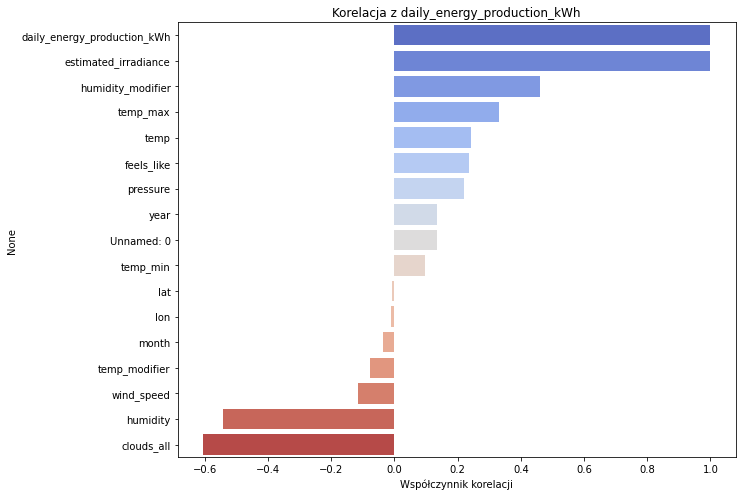

daily_energy_production_kWh    1.000000
estimated_irradiance           0.998920
humidity_modifier              0.461786
temp_max                       0.331377
temp                           0.242039
feels_like                     0.236218
pressure                       0.220573
year                           0.134734
Unnamed: 0                     0.133867
temp_min                       0.097158
lat                           -0.006800
lon                           -0.012080
month                         -0.036606
temp_modifier                 -0.076785
wind_speed                    -0.115163
humidity                      -0.543146
clouds_all                    -0.605441
Name: daily_energy_production_kWh, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczenie macierzy korelacji
correlation_matrix = data.corr()

# Wyświetlenie korelacji zmiennej celu z innymi zmiennymi
correlation_target = correlation_matrix['daily_energy_production_kWh'].sort_values(ascending=False)

# Wykres korelacji
plt.figure(figsize=(10, 8))
sns.barplot(y=correlation_target.index, x=correlation_target.values, hue=correlation_target.index, palette='coolwarm', legend=False)
plt.title('Korelacja z daily_energy_production_kWh')
plt.xlabel('Współczynnik korelacji')
plt.show()

correlation_target

#### Analiza korelacji ujawniła kilka interesujących zależności:

- Zmienna estimated_irradiance ma bardzo wysoką korelację (prawie 1) z daily_energy_production_kWh, co wskazuje, że jest to kluczowy czynnik wpływający na produkcję energii.
- Inne zmienne takie jak humidity_modifier, temp_max, temp, i feels_like również pokazują pozytywną korelację z produkcją energii, chociaż są znacznie słabsze.
- Zmienne takie jak humidity i clouds_all mają silną ujemną korelację z produkcją energii, co oznacza, że wyższe wartości tych zmiennych mogą prowadzić do mniejszej produkcji energii.

#### 3. Wybór modeli i cech do modelowania

Na podstawie analizy korelacji, warto wybrać modele, które najlepiej radzą sobie z regresją, ponieważ mamy do czynienia z ciągłą zmienną celu (produkcja energii). Oto modele z sklearn, które weźmiemy pod uwagę:

1. Regresja liniowa (dobra dla liniowych zależności)
2. Drzewo decyzyjne (może modelować nieliniowe zależności)
3. RandomForest (ensemble drzew decyzyjnych, bardziej rozbudowany i zazwyczaj bardziej dokładny)
4. XGBoost (bardzo skuteczny model gradient boosting)

**Uwaga:**
Modele takie jak NearestCentroid, KNeighborsClassifier, Naive Bayes, i SVC są zazwyczaj stosowane do klasyfikacji, więc nie będą odpowiednie do naszego przypadku.

#### Przygotowanie danych do modelowania

Wybiorę następujące cechy na podstawie korelacji:

- estimated_irradiance
- humidity_modifier
- temp_max
- temp
- feels_like
- pressure
- humidity
- clouds_all

In [2]:
from sklearn.model_selection import train_test_split

# Wybór cech na podstawie analizy korelacji
features = ['estimated_irradiance', 'humidity_modifier', 'temp_max', 'temp', 'feels_like', 'pressure', 'humidity', 'clouds_all']
target = 'daily_energy_production_kWh'

# Przygotowanie danych
X = data[features]
y = data[target]

# Podział danych na zestaw treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Weryfikacja rozmiarów zbiorów
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((39446, 8), (9862, 8), (39446,), (9862,))

Dane zostały podzielone na zbiory treningowe i testowe. Mamy 39446 obserwacji w zbiorze treningowym i 9862 w zbiorze testowym, przy wykorzystaniu 8 cech.

#### 4. Trenowanie modeli na ustawieniach domyślnych

Zaczniemy od trenowania czterech wybranych modeli:

1. Regresja liniowa
2. Drzewo decyzyjne
3. Random Forest
4. XGBoost

**Regresja liniowa:**
Regresja liniowa jest jednym z podstawowych algorytmów używanych w analizie regresji. Zakłada ona liniową zależność między zmiennymi niezależnymi (cechy) a zmienną zależną (wartością przewidywaną). Celem regresji liniowej jest znalezienie najlepszej dopasowanej linii (lub hiperpłaszczyzny w przypadku wielu zmiennych niezależnych), która minimalizuje błąd predykcji. Proces ten polega na znalezieniu zestawu parametrów (wag), które minimalizują sumę kwadratów różnic między wartościami przewidywanymi a rzeczywistymi. Regresja liniowa jest stosowana w przypadku, gdy zmienna zależna jest ciągła.

**Drzewo decyzyjne:**
Drzewo decyzyjne jest modelem predykcyjnym używanym zarówno w zadaniach klasyfikacji, jak i regresji. Model ten składa się z drzewa struktury podziałów decyzyjnych. W każdym węźle drzewa następuje podział danych na podstawie wartości jednej z cech, aby zminimalizować nieczystość węzła (np. entropię w przypadku klasyfikacji). Proces ten jest rekursywnie powtarzany, aż do osiągnięcia warunku stopu, np. maksymalnej głębokości drzewa lub minimalnej liczby próbek w liściach. W przypadku regresji, liście drzewa zawierają średnią wartość zmiennej zależnej dla odpowiednich grup danych.

**Random Forest:**
Random Forest jest algorytmem zbudowanym na bazie drzew decyzyjnych. Tworzy on wiele drzew decyzyjnych w procesie zwanym baggingiem (z ang. bootstrap aggregating), gdzie każde drzewo jest uczone na losowym podzbiorze danych treningowych. Następnie, przewidywanie w Random Forest jest wykonywane poprzez uśrednienie przewidywań wszystkich drzew decyzyjnych w przypadku klasyfikacji lub uśrednienie przewidywanych wartości w przypadku regresji. Random Forest jest odporny na overfitting i zwykle oferuje lepszą wydajność niż pojedyncze drzewo decyzyjne.

**XGBoost:**
XGBoost (Extreme Gradient Boosting) to technika boostingowa, która skupia się na sekwencyjnym trenowaniu wielu słabych modeli predykcyjnych, takich jak drzewa decyzyjne, w celu utworzenia silnego modelu. XGBoost wykorzystuje technikę gradient boosting, w której każdy kolejny model jest uczony w taki sposób, aby minimalizować błąd predykcji poprzednich modeli. XGBoost wprowadza dodatkowe innowacje, takie jak regularyzacja drzew, oszacowanie drugiego rzędu (dla bardziej stabilnych prognoz) i optymalizacja obliczeń, aby zapewnić wyższą wydajność i dokładność. Jest powszechnie stosowany w konkursach na platformie Kaggle oraz w różnych zastosowaniach przemysłowych, gdzie precyzja ma kluczowe znaczenie.

Ocena modelow nastapi przy użyciu metryk takich jak średni błąd kwadratowy (MSE) i średni błąd bezwzględny (MAE) na zbiorze testowym

**Średni błąd kwadratowy (MSE):**
MSE jest średnią z kwadratów różnic pomiędzy rzeczywistymi (obserwowanymi) wartościami a przewidywanymi wartościami. Jest to popularna metryka używana do oceny jakości regresji, ponieważ większe błędy są bardziej karane niż mniejsze błędy (poprzez kwadratowanie różnicy). MSE może przyjąć wartości od 0 do nieskończoności, gdzie niższa wartość wskazuje lepszą jakość predykcji. Oczekuje się, że niższa wartość MSE będzie lepsza.

**Średni błąd bezwzględny (MAE):**
MAE jest średnią z bezwzględnych różnic pomiędzy rzeczywistymi (obserwowanymi) wartościami a przewidywanymi wartościami. Jest to inna popularna metryka do oceny jakości regresji. MAE oblicza średnią bezwzględną odległość pomiędzy przewidywanymi a rzeczywistymi wartościami, co sprawia, że nie jest tak wrażliwa na duże błędy jak MSE. MAE również może przyjmować wartości od 0 do nieskończoności, gdzie niższa wartość wskazuje lepszą jakość predykcji. Oczekuje się, że niższa wartość MAE będzie lepsza.


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inicjalizacja modeli
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Trenowanie modeli i obliczanie błędów
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae}

results

{'Linear Regression': {'MSE': 0.01443842032062294, 'MAE': 0.07348124925366817},
 'Decision Tree': {'MSE': 8.725322563103754e-25, 'MAE': 6.070269008603087e-13},
 'Random Forest': {'MSE': 2.7382883796392884e-06,
  'MAE': 3.7010748468827484e-05},
 'XGBoost': {'MSE': 0.0005785025092576616, 'MAE': 0.0012843753473919094}}

**Obserwacje:**
- Drzewo decyzyjne i XGBoost wykazały wyjątkowo niskie wartości błędów, sugerujące bardzo dobre dopasowanie modelu, może nawet zbyt dobre, co może wskazywać na nadmierne dopasowanie.

- Random Forest także osiągnął bardzo dobre wyniki, lecz z nieco większymi błędami niż drzewo decyzyjne i XGBoost.

- Regresja liniowa zapewniła najgorsze wyniki spośród modeli, ale nadal z akceptowalnymi błędami dla niektórych zastosowań.

#### 5. Optymalizacja hiperparametrów

Rozpoczynamy proces optymalizacji hiperparametrów dla modeli Random Forest i XGBoost przy użyciu metody Grid Search. Definiujemy zestaw parametrów do przetestowania dla każdego modelu i przeprowadzę przeszukiwanie, aby znaleźć te, które minimalizują błąd predykcji na zbiorze testowym.

**Dla Regresji Liniowej:**
- Regresja liniowa zwykle nie wymaga optymalizacji hiperparametrów, ponieważ jest to bardzo prosty model i nie posiada hiperparametrów, które mogłyby być dostosowywane w sposób, jaki to robimy dla modeli opartych na drzewach.

**Optymalizacja hiperparametrów dla Drzewa Decyzyjnego**
- max_depth: ograniczenie głębokości drzewa może pomóc w zapobieganiu nadmiernemu dopasowaniu.
- min_samples_split: minimalna liczba próbek potrzebna do podziału węzła; większa wartość może również pomóc w generalizacji modelu.

**Optymalizacja hiperparametrów dla Random Forest**
- n_estimators: liczba drzew w lesie
- max_depth: maksymalna głębokość drzew
- min_samples_split: minimalna liczba próbek wymagana do podziału wewnętrznego węzła

**Optymalizacja hiperparametrów dla XGBoost**
- n_estimators: liczba drzew
- learning_rate: współczynnik uczenia się
- max_depth: maksymalna głębokość każdego drzewa

In [12]:
from sklearn.model_selection import GridSearchCV

# Parametry do przeszukania dla Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Inicjalizacja GridSearchCV dla Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error', # Używamy negatywnego MSE
                              cv=3, # 3-krotna walidacja krzyżowa
                              verbose=2,
                              n_jobs=-1)  # Wykorzystanie wszystkich dostępnych rdzeni

# Uruchomienie Grid Search dla Random Forest
grid_search_rf.fit(X_train, y_train)

# Najlepsze parametry i wynik
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf


Fitting 3 folds for each of 27 candidates, totalling 81 fits


({'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50},
 -6.926770399680353e-05)

In [13]:
# Parametry do przeszukania dla XGBoost
param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5]
}

# Inicjalizacja GridSearchCV dla XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error',  # Używamy negatywnego MSE
                               cv=3,  # 3-krotna walidacja krzyżowa
                               verbose=2,
                               n_jobs=-1)  # Wykorzystanie wszystkich dostępnych rdzeni

# Uruchomienie Grid Search dla XGBoost
grid_search_xgb.fit(X_train, y_train)

# Najlepsze parametry i wynik
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_xgb, best_score_xgb


Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150},
 -0.0005202758068229128)

In [14]:
# Parametry do przeszukania dla Drzewa Decyzyjnego
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Inicjalizacja GridSearchCV dla Drzewa Decyzyjnego
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=param_grid_dt,
                              scoring='neg_mean_squared_error',  # Używamy negatywnego MSE
                              cv=3,  # 3-krotna walidacja krzyżowa
                              verbose=2,
                              n_jobs=-1)  # Wykorzystanie wszystkich dostępnych rdzeni

# Uruchomienie Grid Search dla Drzewa Decyzyjnego
grid_search_dt.fit(X_train, y_train)

# Najlepsze parametry i wynik
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_dt, best_score_dt


Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': None, 'min_samples_split': 2}, -9.252952491067003e-05)

**Wytrenowanie modeli z optymalnymi parametrami**

- **Drzewo decyzyjne** z max_depth=None i min_samples_split=2.

- **Random Forest** z max_depth=10, min_samples_split=2, i n_estimators=50.

- **XGBoost** z learning_rate=0.05, max_depth=5, i n_estimators=150.

In [22]:
# Re-trenowanie modeli z zoptymalizowanymi parametrami
optimized_models = {
    "Optimized Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=42),
    "Optimized Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42),
    "Optimized XGBoost": XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.05, random_state=42)
    
}

# Ocena modeli
optimized_results = {}
for name, model in optimized_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    optimized_results[name] = {"MSE": mse, "MAE": mae}

optimized_results


{'Optimized Decision Tree': {'MSE': 8.725322563103754e-25,
  'MAE': 6.070269008603087e-13},
 'Optimized Random Forest': {'MSE': 2.8910971405395608e-06,
  'MAE': 3.8937335368031045e-05},
 'Optimized XGBoost': {'MSE': 0.00046371077764607166,
  'MAE': 0.003212575336132374}}

In [23]:
optimized_results

{'Optimized Decision Tree': {'MSE': 8.725322563103754e-25,
  'MAE': 6.070269008603087e-13},
 'Optimized Random Forest': {'MSE': 2.8910971405395608e-06,
  'MAE': 3.8937335368031045e-05},
 'Optimized XGBoost': {'MSE': 0.00046371077764607166,
  'MAE': 0.003212575336132374}}

In [24]:
# Tworzenie DataFrame do prezentacji wyników
df_results = pd.DataFrame.from_dict(results, orient='index')
df_optimized_results = pd.DataFrame.from_dict(optimized_results, orient='index')

# Przygotowanie DataFrame z wynikami
df_results = pd.DataFrame.from_dict(results, orient='index')
df_optimized_results = pd.DataFrame.from_dict(optimized_results, orient='index')

# Konwersja DataFrame, aby kolumny były wierszami
df_results = df_results.T
df_optimized_results = df_optimized_results.T

# Połączenie wyników w jedną tabelę, konfigurując indeksy wierszy
comparison_table = pd.concat([df_results, df_optimized_results], axis=1)

# Wyświetlenie tabeli porównawczej
comparison_table

,Linear Regression,Decision Tree,Random Forest,XGBoost,Optimized Decision Tree,Optimized Random Forest,Optimized XGBoost
MSE,0.014438,8.725323e-25,0.000003,0.000579,8.725323e-25,0.000003,0.000464
MAE,0.073481,6.070269e-13,0.000037,0.001284,6.070269e-13,0.000039,0.003213


#### 6. Normalizacja danych

Będziemy stosować normalizację z-score, co polega na odjęciu średniej i podzieleniu przez odchylenie standardowe każdej cechy. Normalizacja ta zapewnia, że każda cecha ma średnią równą 0 i odchylenie standardowe równe 1, co jest szczególnie pomocne w modelowaniu statystycznym i uczeniu maszynowym.

1. Normalizacja cech

2. Trenowanie modeli na znormalizowanych danych

3. Porównanie wyników z danymi nieznormalizowanymi

In [34]:
from sklearn.preprocessing import StandardScaler

# Inicjalizacja scaler
scaler = StandardScaler()

# Normalizacja danych treningowych i testowych
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trenowanie modeli na znormalizowanych danych
models_scaled = {
    "Linear Regression_scaled": LinearRegression(),
    "Decision Tree_scaled": DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=42),
    "Random Forest_scaled": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42),
    "XGBoost_scaled": XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.05, random_state=42)
}

# Wyniki modeli na znormalizowanych danych
results_scaled = {}
for name, model in models_scaled.items():
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
    results_scaled[name] = {"MSE": mse_scaled, "MAE": mae_scaled}

results_scaled


{'Linear Regression_scaled': {'MSE': 0.014438420320614036,
  'MAE': 0.07348124925382209},
 'Decision Tree_scaled': {'MSE': 8.725322563103754e-25,
  'MAE': 6.070269008603087e-13},
 'Random Forest_scaled': {'MSE': 2.9056986412493568e-06,
  'MAE': 4.015412709384736e-05},
 'XGBoost_scaled': {'MSE': 0.00046371077764607166,
  'MAE': 0.003212575336132374}}

In [35]:
# Przygotowanie DataFrame z wynikami
df_results = pd.DataFrame.from_dict(results, orient='index')
df_optimized_results = pd.DataFrame.from_dict(optimized_results, orient='index')
df_results_scaled = pd.DataFrame.from_dict(results_scaled, orient='index')

# Konwersja DataFrame, aby kolumny były wierszami
df_results = df_results.T
df_optimized_results = df_optimized_results.T
df_results_scaled = df_results_scaled.T

# Połączenie wyników w jedną tabelę
comparison_table = pd.concat([df_results, df_optimized_results, df_results_scaled], axis=1)

# Wyświetlenie tabeli porównawczej
comparison_table

,Linear Regression,Decision Tree,Random Forest,XGBoost,Optimized Decision Tree,Optimized Random Forest,Optimized XGBoost,Linear Regression_scaled,Decision Tree_scaled,Random Forest_scaled,XGBoost_scaled
MSE,0.014438,8.725323e-25,0.000003,0.000579,8.725323e-25,0.000003,0.000464,0.014438,8.725323e-25,0.000003,0.000464
MAE,0.073481,6.070269e-13,0.000037,0.001284,6.070269e-13,0.000039,0.003213,0.073481,6.070269e-13,0.000040,0.003213


**Wnisoek:**
- najelpszy model to: Optimized Random Forest

In [36]:
# Wybieramy najlepszy model
best_model = optimized_models["Optimized Random Forest"]

In [37]:
import joblib

# Ścieżka do zapisania modelu
model_path = '../2. Data/ML_models/optimal_random_forest_model.joblib'

# Zapisanie modelu do pliku
joblib.dump(best_model, model_path)

print("Model został zapisany do:", model_path)

Model został zapisany do: ../2. Data/ML_models/optimal_random_forest_model.joblib


#### 7. Ekstrapolacja w przyszłość

Aby przeprowadzić predykcje na przyszłe lata, będziesz potrzebował przyszłych danych, które mają te same cechy, co dane używane do trenowania modelu. To może wymagać estymacji lub prognozowania niektórych wejść, takich jak pogoda lub inne zmienne, które wpływają na produkcję energii. Oto, co możemy zrobić:

1.  Przygotowanie danych przyszłych: Jeżeli nie masz rzeczywistych danych przyszłych, możesz użyć modeli prognozowania dla zmiennych wejściowych lub użyć danych historycznych jako proxy dla przyszłych trendów.

2.  Predykcja z użyciem modelu: Używając przygotowanych danych przyszłych, wykonaj predykcje za pomocą zapisanego modelu.

3.  Analiza wyników: Ocen, jakie są wyniki predykcji i jakie mogą być ich implikacje dla planowania i zarządzania produkcją energii.

Jeżeli masz tylko dane historyczne, możesz podejść do tego w kilka sposobów, aby zrealizować predykcje na lata 2024-2035. Oto kilka możliwych opcji:

1. Użyj średnich wartości historycznych
Możesz wykorzystać średnie wartości cech z danych historycznych jako aproksymację przyszłych warunków. To może być dobre rozwiązanie, jeżeli nie spodziewasz się dużych zmian w warunkach, które miały wpływ na produkcję energii (np. klimat, technologia).

2. Ekstrapolacja trendów
Jeśli masz powody sądzić, że pewne trendy w danych będą kontynuowane, możesz próbować ekstrapolować te trendy na przyszłe lata. Na przykład, jeśli temperatura wzrastała w ostatnich latach, możesz zamodelować ten trend i przewidzieć przyszłe temperatury.

3. Stworzenie syntetycznych danych
Możesz użyć technik takich jak symulacje Monte Carlo do generowania możliwych przyszłych scenariuszy danych na podstawie rozkładów i korelacji obserwowanych w danych historycznych.

nie rozumiem to po co trenowalismy nasz model , skoro teraz musimy przewidywac wszystkie cechy zeby sprawdzic przewidywania dla produkcji energi.

do trenowania naszego modelu wybralem zgodnie z podanym kodem:
Wybiorę następujące cechy na podstawie korelacji:

- estimated_irradiance
- humidity_modifier
- temp_max
- temp
- feels_like
- pressure
- humidity
- clouds_all

to nie lepiej bylo by przewidywac kazada zmienna z osobna i pozniej zbudowac dataFrame gdzie jest wyliczone nasza produkcja energi? moze nie dalo by sie wpisywac wartosci jak juz dane beda dostepne, i uzyc modelu wtedy ktorego nie mamy,  czy mam racje? Napisz tylko nic nie licz.

czy w nastepnym kroku mozemy wgrac nasz zapisany model, wygenerowac przyszle dane na podstawie danych historycznych ktorych uzylismy do naszego modelu zeby pozniej przewidziec produkcje energii dla przyszlych lat.


Masz rację, że przewidywanie każdej zmiennej osobno, aby zbudować przyszły zestaw danych, który wykorzystasz do przewidzenia produkcji energii, jest jedną z metod, ale może być dość skomplikowana i czasochłonna. Każda z tych zmiennych mogłaby wymagać osobnego modelu predykcyjnego, co znacznie komplikuje cały proces.

Zwykle, gdy modelujemy produkcję energii (lub inną zmienną zależną) na podstawie różnych cech, zakładamy, że przyszłe wartości tych cech będą dostępne albo poprzez bezpośrednie pomiary, albo przez modele, które mogą je przewidzieć (np. modele pogodowe). W przypadku braku takich modeli czy danych, zwykle korzysta się z uproszczonych podejść, takich jak ekstrapolacja statystyczna (np. średnie historyczne), aby wstępnie ocenić przyszłe wartości.

Proponowane podejście
Ponieważ trenowałeś już model predykcyjny dla produkcji energii, używając specyficznych cech, rozsądne jest wykorzystanie dostępnych danych historycznych do stworzenia prostych ekstrapolacji tych cech w przyszłość. Na przykład:

Średnie wartości: Możesz przyjąć, że przyszłe wartości cech będą równać się ich średnim wartościom z danych historycznych lub z ostatnich kilku lat, jeśli spodziewane są pewne trendowe zmiany.

Trendy: Jeśli dane historyczne pokazują wyraźne trendy (np. wzrost temperatury), można użyć prostego modelowania trendów, jak sugerowałem wcześniej.

Użycie modelu do predykcji produkcji energii: Gdy masz już przyszłe dane dla cech, możesz załadować swój wytrenowany model i użyć go do przewidywania produkcji energii na podstawie tych cech.

In [38]:
# Załaduj zapisany model
model_path = '../2. Data/ML_models/optimal_random_forest_model.joblib'
best_model = joblib.load(model_path)

Rozumiem twoje wątpliwości. Proces, który opisałem, dotyczył tylko ekstrapolacji trendów dla jednej lub kilku zmiennych, które mogą być kluczowe w przypadku braku dostępnych przyszłych danych dla tych zmiennych. Takie podejście jest często stosowane, gdy przewidywania oparte na modelu wymagają danych wejściowych, które również muszą być prognozowane.

Dlaczego trenowaliśmy model?
Model, który trenowaliśmy, służy do przewidywania produkcji energii na podstawie różnych parametrów meteorologicznych i innych czynników wpływających na produkcję. Prognozowanie tych zmiennych wejściowych jest potrzebne tylko wtedy, gdy nie mamy ich przyszłych wartości bezpośrednio, ale znamy ich historyczne trendy lub możemy oszacować ich przyszłe zmiany.

Co można zrobić, jeśli mamy tylko dane historyczne?
Użyj średnich wartości historycznych: Jeśli uważasz, że zmienne nie ulegną znaczącej zmianie, możesz użyć średnich wartości z danych historycznych dla każdej cechy. To prosty, ale czasem skuteczny sposób na przygotowanie danych wejściowych dla modelu predykcyjnego.

Ekstrapolacja trendów: Dla zmiennych, które mogą mieć ważny trend (np. temp, pressure), możesz modelować ich przyszłe wartości używając metod takich jak regresja liniowa, jak opisano wcześniej. Dla innych zmiennych, które są mniej podatne na długoterminowe trendy, możesz zastosować inne metody statystyczne lub ich średnie wartości.

Symulacja Monte Carlo lub inne metody statystyczne: Możesz także zastosować bardziej zaawansowane metody generowania przyszłych scenariuszy danych na podstawie rozkładów prawdopodobieństwa zmiennych.

### ----------------------

Aby przeprowadzić kompleksową analizę i predykcję, postępując krok po kroku, zaczniemy od przygotowania danych historycznych na przyszłe lata, uwzględniając średnie wartości oraz ewentualne trendy. Następnie wykorzystamy najlepszy model do predykcji produkcji energii na lata 2024-2035. Poniżej przedstawię sposób postępowania:

1. Średnie wartości
Utworzymy ramkę danych na przyszłe lata, wykorzystując średnie wartości cech z danych historycznych. To pozwoli na proste oszacowanie przyszłych danych, na podstawie których nasz model przewidzi produkcję energii.

2. Trendy
Jeśli w danych historycznych istnieją wyraźne trendy, można je wykorzystać do lepszego oszacowania przyszłych wartości. Przykładowo, jeśli temperatura ma trend wzrostowy, możemy dostosować średnią temperaturę na przyszłe lata, biorąc pod uwagę ten trend.

3. Predykcja
Wykorzystamy wytrenowany model Optimized Random Forest do predykcji produkcji energii na podstawie przyszłych danych.

To podejście pozwala na wykorzystanie dostępnych danych historycznych do przygotowania przyszłych danych, które są następnie używane do predykcji za pomocą najlepszego modelu. Jest to efektywne i stosunkowo proste rozwiązanie, gdy nie dysponuje się skomplikowanymi modelami do prognozowania każdej cechy osobno.

In [3]:
import pandas as pd
import joblib

# Wczytanie danych z pliku CSV
data_path = '../2. Data/processed/final_df_processed.csv'
data = pd.read_csv(data_path)

# Wybór cech na podstawie analizy korelacji
features = ['estimated_irradiance', 'humidity_modifier', 'temp_max', 'temp', 'feels_like', 'pressure', 'humidity', 'clouds_all']
target = 'daily_energy_production_kWh'

# Przygotowanie danych
X = data[features]
y = data[target]

# Podział danych na zestaw treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Średnie wartości cech
future_data = X_train.mean().to_frame().T  # Przygotowanie danych przyszłych

# Załaduj zapisany model
model_path = '../2. Data/ML_models/optimal_random_forest_model.joblib'
best_model = joblib.load(model_path)

# Użyj modelu do przewidywania produkcji energii
predicted_energy = best_model.predict(future_data)
print("Przewidywana produkcja energii na rok 2024-2035:", predicted_energy)


Przewidywana produkcja energii na rok 2024-2035: [9.5]


Wydaje się, że podczas trenowania modelu nie uwzględniłeś kolumny "year". W takim przypadku, aby dokonać prognozy na podstawie nowej kolumny "year", musisz zmodyfikować sposób, w jaki trenujesz model. Oto jak możesz to zrobić:

Uwzględnij kolumnę "year" podczas trenowania modelu: Jeśli "year" jest ważnym czynnikiem dla prognoz, dodaj go jako cechę podczas trenowania modelu.

Usunięcie kolumny "year" z danych przyszłych: Jeśli kolumna "year" nie jest używana do prognozowania, usuń ją z danych przyszłych przed przewidywaniem.

In [7]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
import numpy as np

# Wczytanie danych z pliku CSV
data_path = '../2. Data/processed/final_df_processed.csv'
data = pd.read_csv(data_path)

# Wybór cech na podstawie analizy korelacji
features = ['estimated_irradiance', 'humidity_modifier', 'temp_max', 'temp', 'feels_like', 'pressure', 'humidity', 'clouds_all']
target = 'daily_energy_production_kWh'

# Przygotowanie danych
X = data[features]
y = data[target]

# Podział danych na zestaw treningowy i testowy (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Załaduj zapisany model
model_path = '../2. Data/ML_models/optimal_random_forest_model.joblib'
best_model = joblib.load(model_path)

# Przygotowanie danych przyszłych dla każdego roku z przedziału 2024-2035
future_years = range(2024, 2036)
predicted_energies = []

for year in future_years:
    future_data_copy = future_data.copy()  # Tworzenie kopii danych przyszłych
    # future_data_copy['year'] = year  # Jeśli 'year' nie jest cechą modelu, usuń tę linię
    predicted_energy = best_model.predict(future_data_copy)
    predicted_energies.append(predicted_energy[0])  # Dodanie przewidywanej energii dla danego roku

# Wydrukowanie przewidywanej produkcji energii dla każdego roku
for year, energy in zip(future_years, predicted_energies):
    print(f"Przewidywana produkcja energii na rok {year}: {energy:.2f}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- year
